<a href="https://colab.research.google.com/github/MadeaRiggs/AIPlanet-Deep-Learning-projects/blob/main/AIPlanet_digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating a simple neural network with 784 input layers and 10 output layers

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
len(X_train)

60000

In [ ]:
len(X_test)

10000

In [ ]:
#This means that the sample is a 28 by 28 pixel image
X_train[0].shape

(28, 28)

In [ ]:
#How the image is represented in numbers in form of 2D array
#'0' means Black and '255' represents white
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

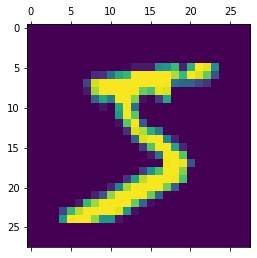

In [ ]:
#lotting the first image
plt.matshow(X_train[0])

In [ ]:
y_train[0]

5

In [ ]:
#It contains numbers 5, 0, 4, 1,9
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

To increase accuracy, you need to scale the values. In our case, we need to scale our values from (0-255) to (0-1).

This is done **after** you have created and run the neural network and got a low accuracy 

In [ ]:
X_train= X_train /255
X_test= X_test /255

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
#To flatten the image so that it can be a 1D array for it to fit in the neurons
X_train_flattened= X_train.reshape(len(X_train), 28*28) #Ensure that the number of elements are same as before
X_train_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X_train_flattened.shape

(60000, 784)

In [ ]:
#Flatten x_test
X_test_flattened= X_test.reshape(len(X_test), 28*28)
X_test_flattened.shape

(10000, 784)

In [ ]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

**Sequential** means we are having a stack of layers in the NN

**dense** means all neurons in one layer are connected to every neuron n the second layer

**10** represents neurons in output layer, **784** in input layer and **activation** defines the activation function

optimizers allows you to train the model efficiently

In [ ]:
#creating the NN
model= keras.Sequential([
    keras.layers.Dense(10, input_shape=(784, ), activation='sigmoid') 
])
#categorical means our output classes have 10 categories i.e between 0-9
#sparse means our output variable(y_train) is an integer
model.compile(
    optimizer='adam', 
    loss= 'sparse_categorical_crossentropy',
    metrics=['accuracy'] 
    )
#epoch is the n.o of iterations for which the NN will run the training
#It is providing training on the train dataset
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4696 - accuracy: 0.8785
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3036 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2837 - accuracy: 0.9212
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2733 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2666 - accuracy: 0.9262


In [ ]:
#to evaluate the test data accuracy
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2693 - accuracy: 0.9257


[0.26931867003440857, 0.9257000088691711]

In [ ]:
model.predict(X_test_flattened)

313/313 [==============================] - 1s 2ms/step


array([[2.9091295e-02, 3.9484169e-07, 5.8604285e-02, ..., 9.9981058e-01,
        9.9970415e-02, 6.7611128e-01],
       [4.5053610e-01, 4.7649024e-03, 9.9913156e-01, ..., 3.8283978e-13,
        1.0470936e-01, 2.6748559e-09],
       [4.8642256e-04, 9.9186856e-01, 6.2847310e-01, ..., 1.0204019e-01,
        3.7637359e-01, 4.5367099e-02],
       ...,
       [5.7928255e-06, 3.4625241e-06, 1.1322669e-03, ..., 2.6328731e-01,
        5.2611548e-01, 8.0905610e-01],
       [1.4579542e-04, 1.7940100e-04, 1.2068348e-04, ..., 5.3111988e-05,
        6.7770147e-01, 1.7114461e-04],
       [8.1808148e-03, 3.7593573e-10, 1.0305296e-01, ..., 6.8073720e-09,
        1.0038274e-04, 9.9018825e-07]], dtype=float32)

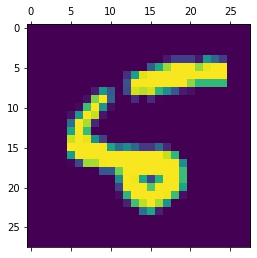

In [ ]:
plt.matshow(X_test[8])

In [ ]:
y_predicted= model.predict(X_test_flattened)
y_predicted[8] #it shows the 10 scores of the output layer

313/313 [==============================] - 0s 1ms/step


array([2.5955522e-01, 3.8774269e-06, 1.3866400e-02, 2.0715181e-06,
       3.5725483e-01, 3.7870222e-01, 9.9944633e-01, 1.6795826e-07,
       5.0169926e-02, 1.7175617e-04], dtype=float32)

In [ ]:
#to identify the real value of the image
np.argmax(y_predicted[8])

6

In [ ]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [ ]:
#since 'y_test' values are integers but 'y_predicted' are float numbers, they cannot be used as labels in that manner. We need to create a list of comprehensions
y_predicted_labels= [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
#to display a confusion matrix
cm= tf.math.confusion_matrix(labels= y_test, predictions= y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    0,    2,    0,    5,    6,    2,    1,    0],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   8,    8,  923,   20,    5,    4,   15,    9,   36,    4],
       [   4,    0,   17,  928,    1,   24,    3,    9,   16,    8],
       [   1,    1,    2,    2,  905,    0,   17,    4,   10,   40],
       [   7,    2,    2,   34,    6,  786,   18,    5,   26,    6],
       [   8,    3,    3,    1,    7,   11,  923,    1,    1,    0],
       [   1,    6,   23,    9,    7,    0,    0,  946,    2,   34],
       [  11,   10,    6,   28,    9,   33,   10,   13,  845,    9],
       [  11,    6,    1,   11,   25,    8,    0,   19,    5,  923]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

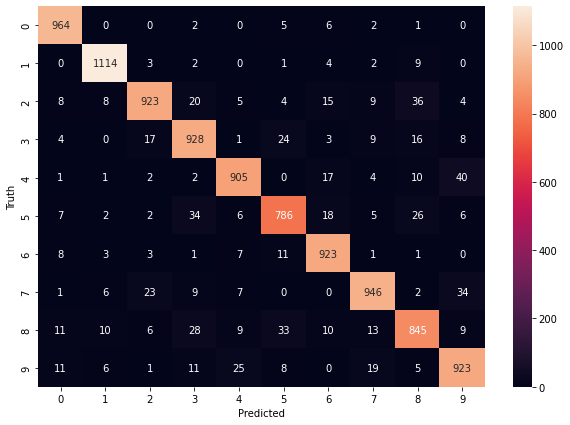

In [ ]:
#to visualize the confusion matrix better
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

The confusion matrix shows that number '0' was accurately predicted as '0'

Anything that is not in the highlighted diagonal is an error

Read the values from Truth to Predicted i.e the value is 6 and the model accurately predicted it as 6 in 923 times

# Adding the Hidden Layer

It may take more time to train the NN

In [ ]:
#creating the NN
model= keras.Sequential([
    #for input layer(784) and the number of neurons are guessed for one hidden layer(100)
    keras.layers.Dense(100, input_shape=(784, ), activation='relu'), 
    #for output layer 
    keras.layers.Dense(10, activation='sigmoid')
])
#categorical means our output classes have 10 categories i.e between 0-9
#sparse means our output variable(y_train) is an integer
model.compile(
    optimizer='adam', 
    loss= 'sparse_categorical_crossentropy',
    metrics=['accuracy'] 
    )
#epoch is the n.o of iterations for which the NN will run the training
#It is providing training on the train dataset
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2798 - accuracy: 0.9205
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1285 - accuracy: 0.9619
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0890 - accuracy: 0.9725
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0682 - accuracy: 0.9787
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0527 - accuracy: 0.9838


In [ ]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0842 - accuracy: 0.9742


[0.08416031301021576, 0.9742000102996826]

313/313 [==============================] - 1s 2ms/step


Text(69.0, 0.5, 'Truth')

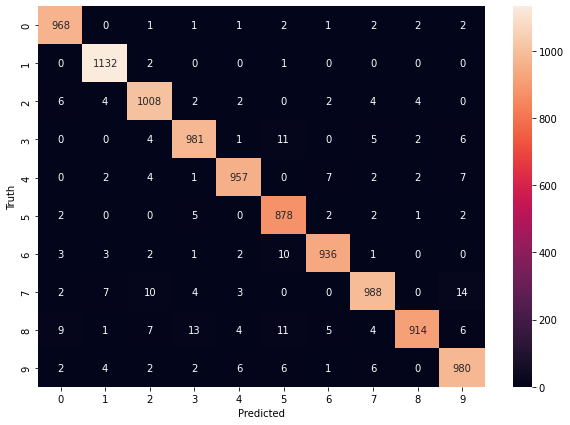

In [ ]:
y_predicted= model.predict(X_test_flattened)
y_predicted_labels= [np.argmax(i) for i in y_predicted]
cm= tf.math.confusion_matrix(labels= y_test, predictions= y_predicted_labels)

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

If you do not want to flatten your 'X_train' data like in the above example which brings a similar accuracy

In [ ]:
#creating the NN
model= keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    #for input layer(784) and the number of neurons are guessed for one hidden layer(100)
    keras.layers.Dense(100, input_shape=(784, ), activation='relu'), 
    #for output layer 
    keras.layers.Dense(10, activation='sigmoid')
])
#categorical means our output classes have 10 categories i.e between 0-9
#sparse means our output variable(y_train) is an integer
model.compile(
    optimizer='adam', 
    loss= 'sparse_categorical_crossentropy',
    metrics=['accuracy'] 
    )
#epoch is the n.o of iterations for which the NN will run the training
#It is providing training on the train dataset
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2659 - accuracy: 0.9252
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1226 - accuracy: 0.9642
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0864 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0648 - accuracy: 0.9806
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0506 - accuracy: 0.9845
